# **Exploratory Data Analysis**

### **Purpose:**

- To explore and inspect all the dimensions and attributes in the dataset.
- To aggregate size metrics by dimensions.
- To rank dimensions based on size metrics.

### **Method**
- Import and load the dataset.
- Clean and filter the dataset.
- Explore the data jobs in dataset.
- Rank the top 20 countries in dataset.
- Rank the top 20 companies in dataset.
- Explore another attributes of dataset.
- Explore the data jobs in United States.
- Rank the top 20 location in United States.
- Rank the top 20 companies in United States.
- Explore another attributes of United States.

### **1. Importing Libraries and Loading The Dataset**

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Change the dataset path using your own for rerun
df = pd.read_csv(r'C:\Users\harto\OneDrive\Dokumen\DATA ANALYST PORTOFOLIO PROJECT\5. Data Jobs Analyis Using Python\dataset\data_jobs.csv')

### **2. Clean The Dataset**

In [ ]:
# Change data type into datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 

In [ ]:
# Change data type into list
def str_to_list(column):
    if pd.notna(column) :
        return ast.literal_eval(column)
    
df['job_skills'] = df['job_skills'].apply(str_to_list)

In [ ]:
# Explore the dimension and measure in dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

### **3. Data Jobs Exploration**

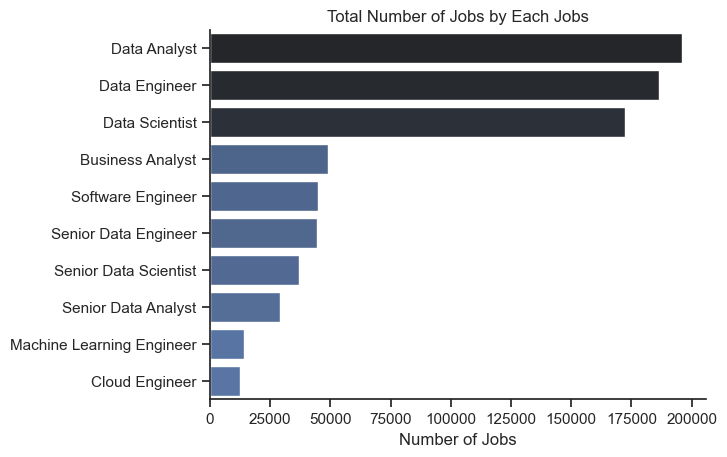

In [6]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_title_short', hue = 'count', legend = False, palette = 'dark:b_r')
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Total Number of Jobs by Each Jobs')
plt.show()


### **4. Country Exploration**

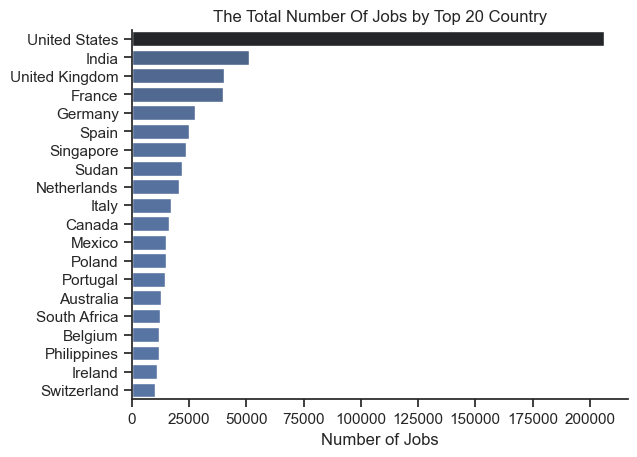

In [7]:
df_plot = df['job_country'].value_counts().head(20)[0:].to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_country', hue = 'count', legend = False, palette = 'dark:b_r')
sns.despine()
plt.title('The Total Number Of Jobs by Top 20 Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### **5. Company Exploration**

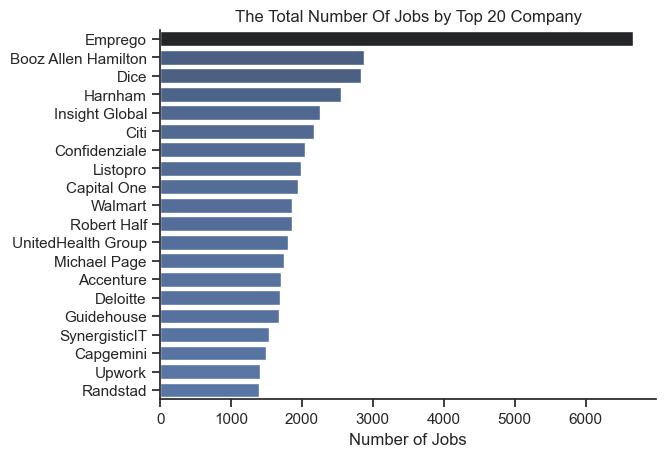

In [9]:
df_plot = df['company_name'].value_counts().head(20)[0:].to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', legend = False, palette = 'dark:b_r')
sns.despine()
plt.title('The Total Number Of Jobs by Top 20 Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### **6. Attributes Exploration**

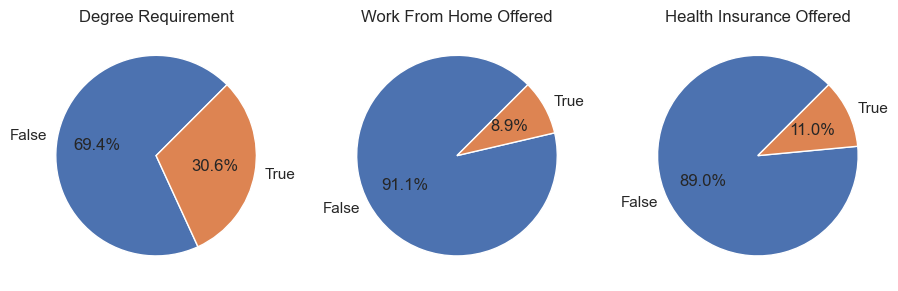

In [11]:
column_to_plot = {
    'job_no_degree_mention' : 'Degree Requirement',
    'job_work_from_home' : 'Work From Home Offered',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize = (11, 4))

for i, (column, subtitle) in enumerate(column_to_plot.items()):
    df[column].value_counts().plot(kind = 'pie', startangle = 45, autopct = '%1.1f%%', ax = ax[i])
    ax[i].set_title(subtitle)
    ax[i].set_ylabel('')
plt.show()

# **EDA for USA Location Only**

### **7. Roles Exploration in United States**

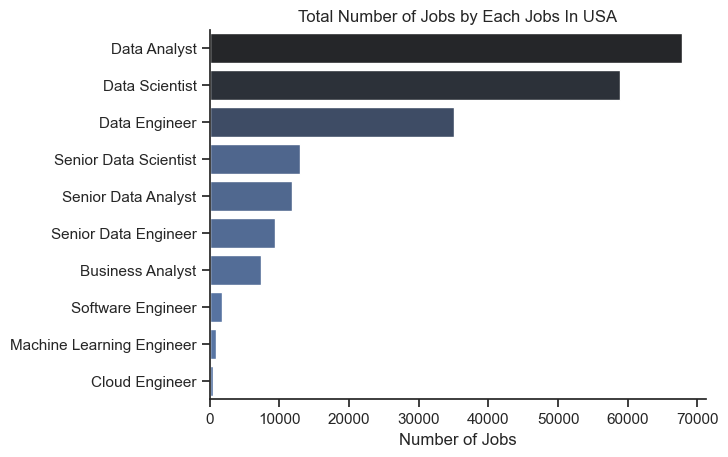

In [12]:
df_plot = df['job_title_short'][df['job_country'] == 'United States'].value_counts().to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_title_short', hue = 'count', legend = False, palette = 'dark:b_r')
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Total Number of Jobs by Each Jobs In USA')
plt.show()

### **8. Location Exploration in United States**

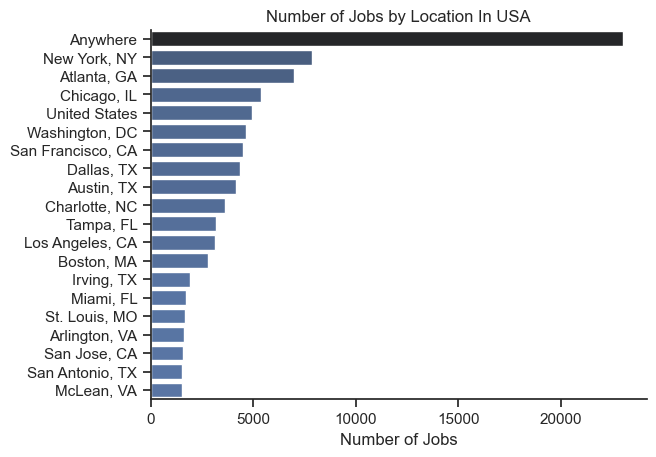

In [13]:
df_plot = df['job_location'][df['job_country'] == 'United States'].value_counts().head(20).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', legend = False, palette = 'dark:b_r')
sns.despine()
plt.title('Number of Jobs by Location In USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### **9. Company Exploration in United States**

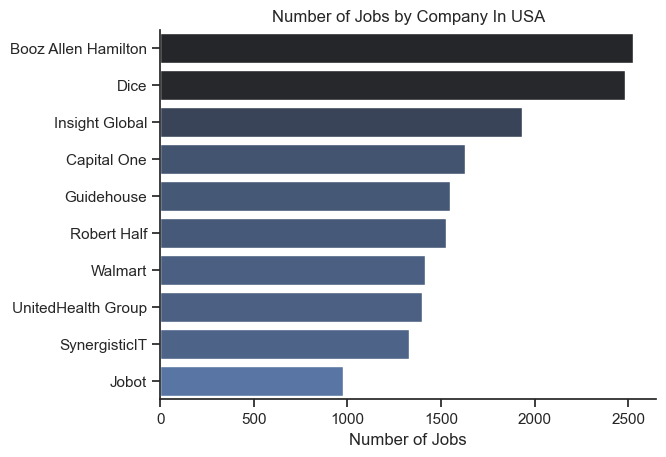

In [15]:
df_plot = df['company_name'][df['job_country'] == 'United States'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'company_name', hue = 'count', legend = False, palette = 'dark:b_r')
sns.despine()
plt.title('Number of Jobs by Company In USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### **10. Attributes Exploration in United States**

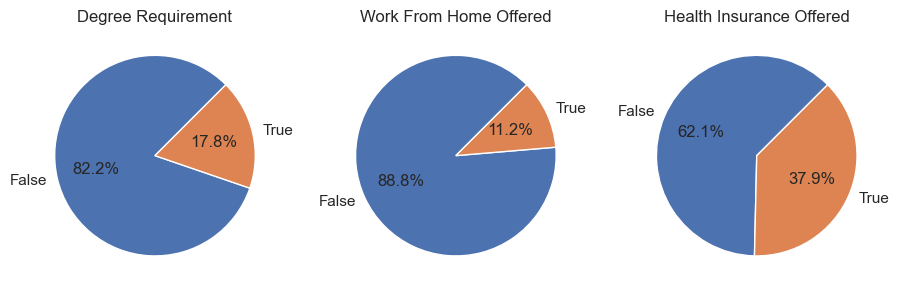

In [16]:
column_to_plot = {
    'job_no_degree_mention' : 'Degree Requirement',
    'job_work_from_home' : 'Work From Home Offered',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3, figsize = (11, 4))

for i, (column, subtitle) in enumerate(column_to_plot.items()):
    df[column][df['job_country'] == 'United States'].value_counts().plot(kind = 'pie', startangle = 45, autopct = '%1.1f%%', ax = ax[i])
    ax[i].set_title(subtitle)
    ax[i].set_ylabel('')
plt.show()